In [201]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

import pandas_profiling as pdp
import warnings 
warnings.filterwarnings("ignore")

import sys



pkm=pd.read_csv("/Users/ajay/Documents/IpyNote/Pokemon.csv")

In [160]:
pkm.head()

#                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1  2                Ivysaur  Grass  Poison    405  60      62       63   
2  3               Venusaur  Grass  Poison    525  80      82       83   
3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4             Charmander   Fire     NaN    309  39      52       43   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0       65       65     45           1      False  
1       80       80     60           1      False  
2      100      100     80           1      False  
3      122      120     80           1      False  
4       60       50     65           1      False

In [161]:
pkm.describe()

#      Total          HP      Attack     Defense     Sp. Atk  \
count  800.000000  800.00000  800.000000  800.000000  800.000000  800.000000   
mean   362.813750  435.10250   69.258750   79.001250   73.842500   72.820000   
std    208.343798  119.96304   25.534669   32.457366   31.183501   32.722294   
min      1.000000  180.00000    1.000000    5.000000    5.000000   10.000000   
25%    184.750000  330.00000   50.000000   55.000000   50.000000   49.750000   
50%    364.500000  450.00000   65.000000   75.000000   70.000000   65.000000   
75%    539.250000  515.00000   80.000000  100.000000   90.000000   95.000000   
max    721.000000  780.00000  255.000000  190.000000  230.000000  194.000000   

          Sp. Def       Speed  Generation  
count  800.000000  800.000000   800.00000  
mean    71.902500   68.277500     3.32375  
std     27.828916   29.060474     1.66129  
min     20.000000    5.000000     1.00000  
25%     50.000000   45.000000     2.00000  
50%     70.000000   65.000000     3.00000  
75%     90.000000   90.000000     5.00000  
max    230.000000  180.000000     6.00000

In [162]:
pdp.ProfileReport(pkm)

In [163]:
pkm=pkm.drop('#',axis=1)

In [164]:
pkm['Generation'].nunique()

6

In [165]:
pkm['Generation'].unique()

array([1, 2, 3, 4, 5, 6])

In [166]:
list(pkm)

['Name',
 'Type 1',
 'Type 2',
 'Total',
 'HP',
 'Attack',
 'Defense',
 'Sp. Atk',
 'Sp. Def',
 'Speed',
 'Generation',
 'Legendary']

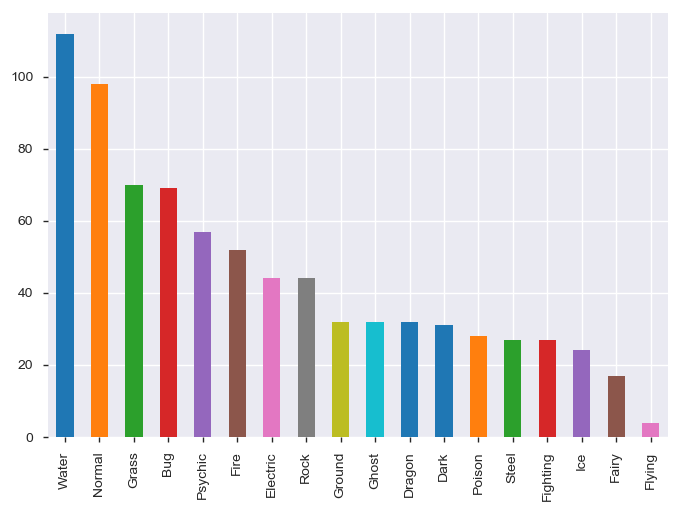

In [167]:
pkm['Type 1'].value_counts().plot.bar()

In [168]:
#pkm.groupby(['Type 1','Type 2']).count()#.unstack()

In [169]:
#df=pkm.groupby(['Type 1','Type 2']).count()#['Name'].unstack().plot.bar()

In [170]:
#pkm.set_index(['Type 1','Type 2'],inplace=True)
#pkm.plot(x=[["Type 1","Type 2"]],y='Name',kind='bar')
#plt.show()

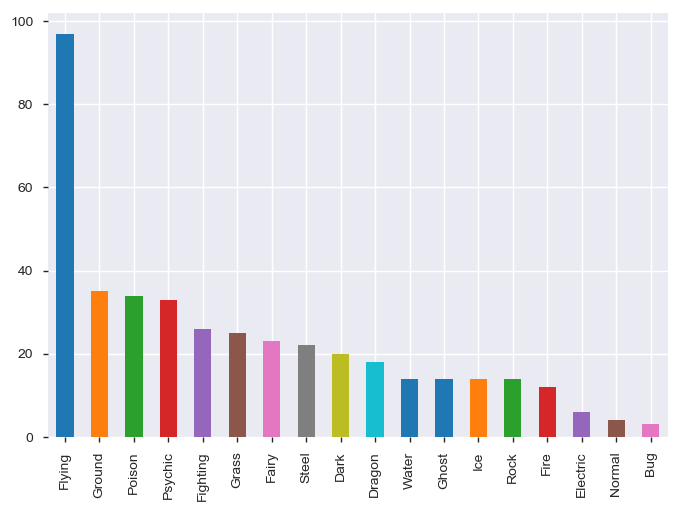

In [171]:
#pkm.loc[:,['Type 1','Type 2']]
pkm['Type 2'].value_counts().plot.bar()
#pkm.plot.bar()

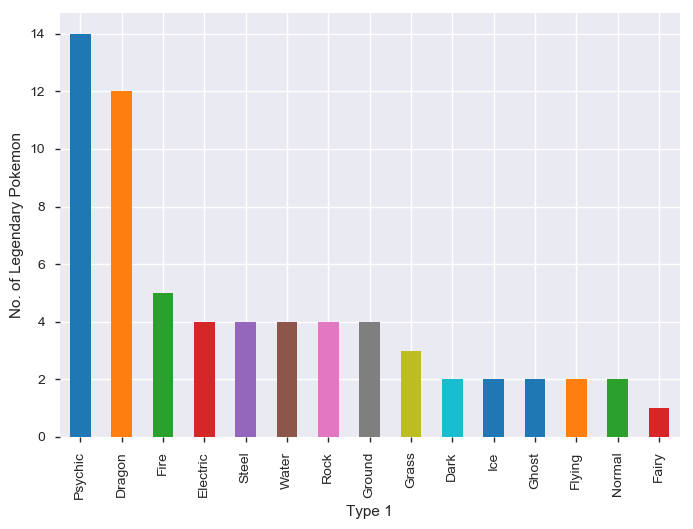

In [172]:
pkm[pkm['Legendary']==True]['Type 1'].value_counts().plot.bar()
plt.xlabel('Type 1')
plt.ylabel('No. of Legendary Pokemon')
plt.show()

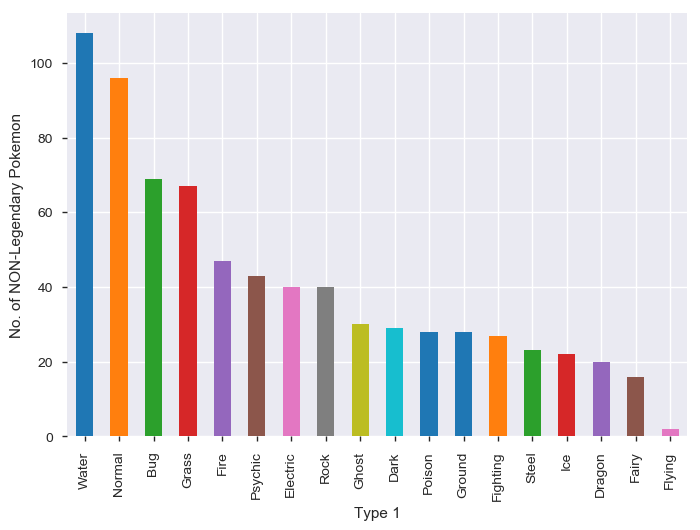

In [173]:
pkm[pkm['Legendary']==False]['Type 1'].value_counts().plot.bar()
plt.xlabel('Type 1')
plt.ylabel('No. of NON-Legendary Pokemon')
plt.show()

In [174]:
pkm[pkm['Name'].str.contains("Mega")]['Name'].replace("Mega","")

3          VenusaurMega Venusaur
7      CharizardMega Charizard X
8      CharizardMega Charizard Y
12       BlastoiseMega Blastoise
19         BeedrillMega Beedrill
23           PidgeotMega Pidgeot
71         AlakazamMega Alakazam
87           SlowbroMega Slowbro
102            GengarMega Gengar
124    KangaskhanMega Kangaskhan
137            PinsirMega Pinsir
141        GyaradosMega Gyarados
154    AerodactylMega Aerodactyl
163          MewtwoMega Mewtwo X
164          MewtwoMega Mewtwo Y
168                     Meganium
196        AmpharosMega Ampharos
224          SteelixMega Steelix
229            ScizorMega Scizor
232      HeracrossMega Heracross
248        HoundoomMega Houndoom
268      TyranitarMega Tyranitar
275        SceptileMega Sceptile
279        BlazikenMega Blaziken
283        SwampertMega Swampert
306      GardevoirMega Gardevoir
327          SableyeMega Sableye
329            MawileMega Mawile
333            AggronMega Aggron
336        MedichamMega Medicham
339      M

In [175]:
#pkm['Name'].str.replace("Mega","")
#above before mega

In [176]:
#pkm['Name']

In [177]:
pkm.head(5)

Name Type 1  Type 2  Total  HP  Attack  Defense  Sp. Atk  \
0              Bulbasaur  Grass  Poison    318  45      49       49       65   
1                Ivysaur  Grass  Poison    405  60      62       63       80   
2               Venusaur  Grass  Poison    525  80      82       83      100   
3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123      122   
4             Charmander   Fire     NaN    309  39      52       43       60   

   Sp. Def  Speed  Generation  Legendary  
0       65     45           1      False  
1       80     60           1      False  
2      100     80           1      False  
3      120     80           1      False  
4       50     65           1      False

In [178]:
pkm['Type 2'].fillna(pkm['Type 1'],inplace=True)

In [179]:
pkm.isnull().sum()

Name          0
Type 1        0
Type 2        0
Total         0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
Legendary     0
dtype: int64

In [180]:
pkm.head(5)

Name Type 1  Type 2  Total  HP  Attack  Defense  Sp. Atk  \
0              Bulbasaur  Grass  Poison    318  45      49       49       65   
1                Ivysaur  Grass  Poison    405  60      62       63       80   
2               Venusaur  Grass  Poison    525  80      82       83      100   
3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123      122   
4             Charmander   Fire    Fire    309  39      52       43       60   

   Sp. Def  Speed  Generation  Legendary  
0       65     45           1      False  
1       80     60           1      False  
2      100     80           1      False  
3      120     80           1      False  
4       50     65           1      False

In [181]:
pkm[(pkm['Type 1']=='Fire') | (pkm['Type 2']=='Dragon') & ((pkm['Type 1']=='Fire') | (pkm['Type 2']=='Dragon'))]

Name    Type 1    Type 2  Total   HP  Attack  \
4                   Charmander      Fire      Fire    309   39      52   
5                   Charmeleon      Fire      Fire    405   58      64   
6                    Charizard      Fire    Flying    534   78      84   
7    CharizardMega Charizard X      Fire    Dragon    634   78     130   
8    CharizardMega Charizard Y      Fire    Flying    634   78     104   
42                      Vulpix      Fire      Fire    299   38      41   
43                   Ninetales      Fire      Fire    505   73      76   
63                   Growlithe      Fire      Fire    350   55      70   
64                    Arcanine      Fire      Fire    555   90     110   
83                      Ponyta      Fire      Fire    410   50      85   
84                    Rapidash      Fire      Fire    500   65     100   
135                     Magmar      Fire      Fire    495   65      95   
147                    Flareon      Fire      Fire    525   65     130   
158                    Moltres      Fire    Flying    580   90     100   
159                    Dratini    Dragon    Dragon    300   41      64   
160                  Dragonair    Dragon    Dragon    420   61      84   
169                  Cyndaquil      Fire      Fire    309   39      52   
170                    Quilava      Fire      Fire    405   58      64   
171                 Typhlosion      Fire      Fire    534   78      84   
196      AmpharosMega Ampharos  Electric    Dragon    610   90      95   
236                     Slugma      Fire      Fire    250   40      40   
237                   Magcargo      Fire      Rock    410   50      50   
249                    Kingdra     Water    Dragon    540   75      95   
259                      Magby      Fire      Fire    365   45      75   
263                      Entei      Fire      Fire    580  115     115   
270                      Ho-oh      Fire    Flying    680  106     130   
275      SceptileMega Sceptile     Grass    Dragon    630   70     110   
276                    Torchic      Fire      Fire    310   45      60   
277                  Combusken      Fire  Fighting    405   60      85   
278                   Blaziken      Fire  Fighting    530   80     120   
..                         ...       ...       ...    ...  ...     ...   
559                     Emboar      Fire  Fighting    528  110     123   
572                    Pansear      Fire      Fire    316   50      53   
573                   Simisear      Fire      Fire    498   75      98   
614                   Darumaka      Fire      Fire    315   70      90   
615    DarmanitanStandard Mode      Fire      Fire    480  105     140   
616         DarmanitanZen Mode      Fire   Psychic    540  105      30   
671                       Axew    Dragon    Dragon    320   46      87   
672                    Fraxure    Dragon    Dragon    410   66     117   
673                    Haxorus    Dragon    Dragon    540   76     147   
682                  Druddigon    Dragon    Dragon    485   77     120   
692                    Heatmor      Fire      Fire    484   85      97   
694                      Deino      Dark    Dragon    300   52      65   
695                   Zweilous      Dark    Dragon    420   72      85   
696                  Hydreigon      Dark    Dragon    600   92     105   
721                   Fennekin      Fire      Fire    307   40      45   
722                    Braixen      Fire      Fire    409   59      59   
723                    Delphox      Fire   Psychic    534   75      69   
730                Fletchinder      Fire    Flying    382   62      73   
731                 Talonflame      Fire    Flying    499   78      81   
735                     Litleo      Fire    Normal    369   62      50   
736                     Pyroar      Fire    Normal    507   86      68   
761                   Dragalge    Poison    Dragon    494   65      75   
766                     Tyrunt

In [182]:
#pkm[]

pkm[pkm['HP']==pkm['HP'].max()]

Name  Type 1  Type 2  Total   HP  Attack  Defense  Sp. Atk  Sp. Def  \
261  Blissey  Normal  Normal    540  255      10       10       75      135   

     Speed  Generation  Legendary  
261     55           2      False

In [183]:
pkm.sort_values('Total',ascending=False).head()

Name   Type 1    Type 2  Total   HP  Attack  Defense  \
426  RayquazaMega Rayquaza   Dragon    Flying    780  105     180      100   
164    MewtwoMega Mewtwo Y  Psychic   Psychic    780  106     150       70   
163    MewtwoMega Mewtwo X  Psychic  Fighting    780  106     190      100   
422    KyogrePrimal Kyogre    Water     Water    770  100     150       90   
424  GroudonPrimal Groudon   Ground      Fire    770  100     180      160   

     Sp. Atk  Sp. Def  Speed  Generation  Legendary  
426      180      100    115           3       True  
164      194      120    140           1       True  
163      154      100    130           1       True  
422      180      160     90           3       True  
424      150       90     90           3       True

In [184]:
pkm.groupby('Type 1').size()

Type 1
Bug          69
Dark         31
Dragon       32
Electric     44
Fairy        17
Fighting     27
Fire         52
Flying        4
Ghost        32
Grass        70
Ground       32
Ice          24
Normal       98
Poison       28
Psychic      57
Rock         44
Steel        27
Water       112
dtype: int64

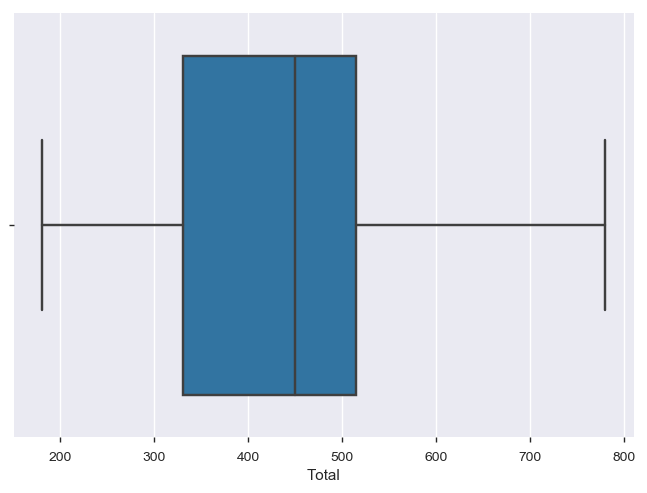

In [185]:
sns.boxplot(pkm['Total'])

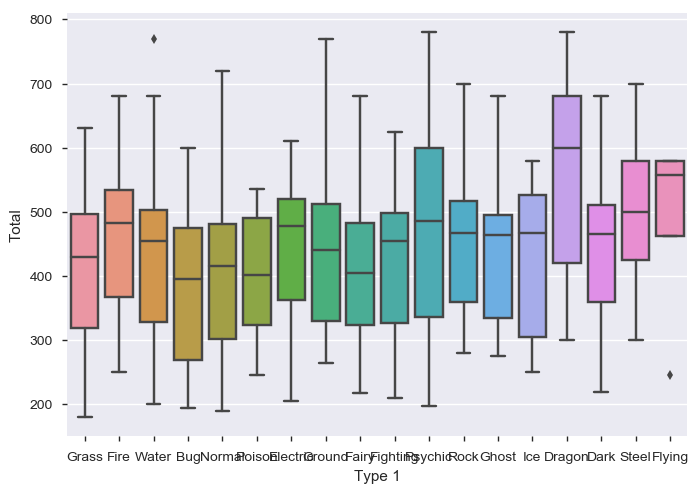

In [186]:
sns.boxplot(x='Type 1',y='Total',data=pkm)

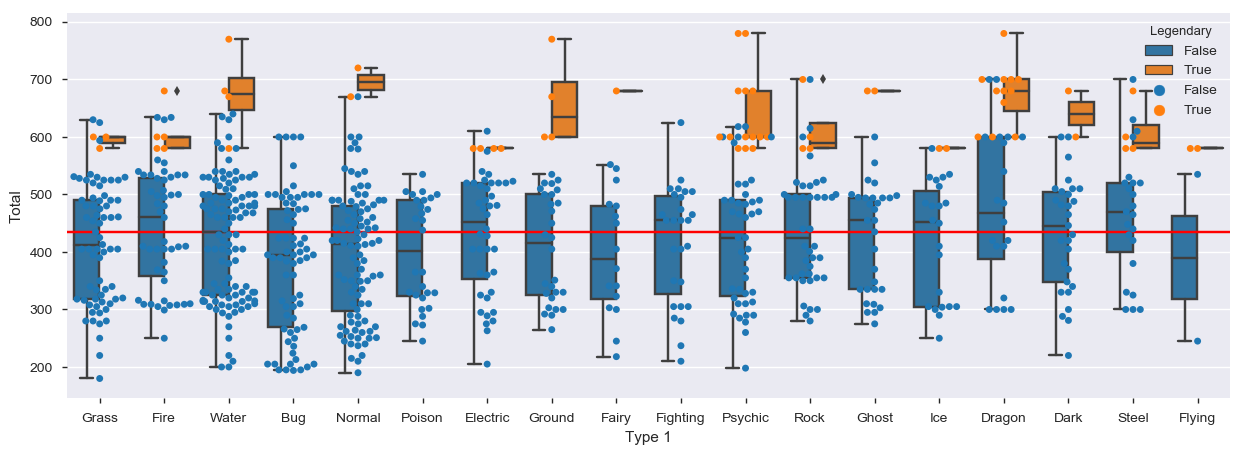

In [187]:
plt.subplots(figsize = (15,5))
sns.boxplot(x='Type 1',y='Total',data=pkm,hue='Legendary')
sns.swarmplot(x='Type 1',y='Total',data=pkm,hue='Legendary')#,color=".25")
plt.axhline(pkm['Total'].mean(),color='red')
plt.show()

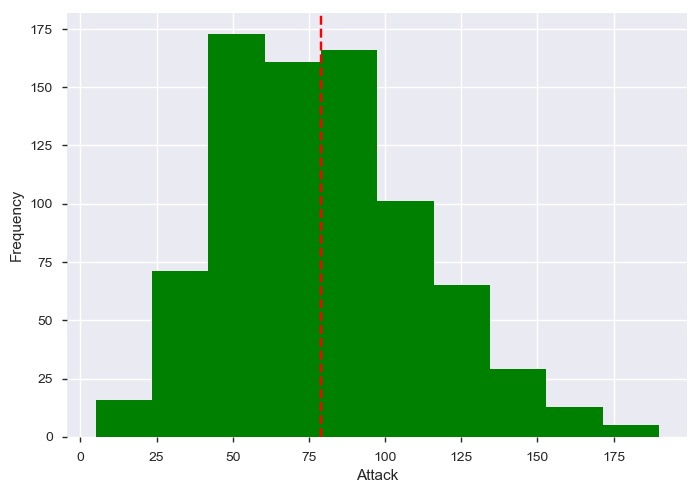

In [188]:
pkm['Attack'].plot.hist(bins=10,color='green')
plt.xlabel('Attack')
plt.axvline(pkm['Attack'].mean(),color='red',linestyle='dashed')
plt.show()

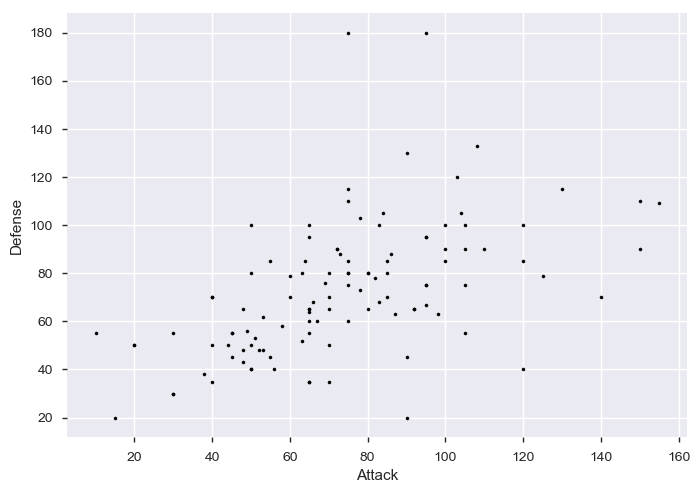

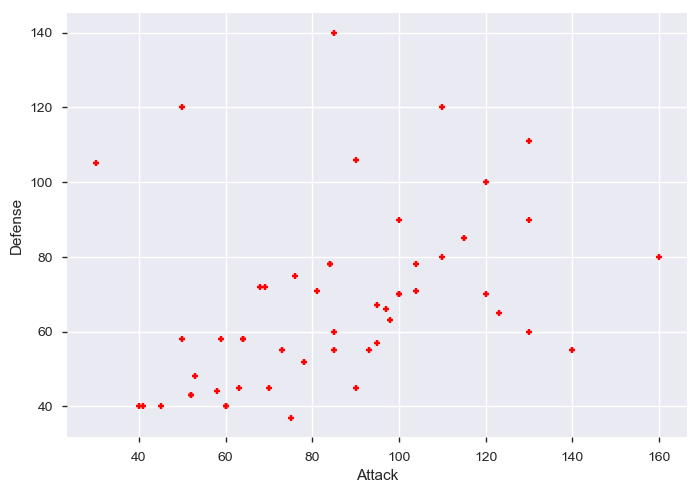

In [189]:
pkm[pkm['Type 1']=='Water'].plot.scatter('Attack','Defense',color='black',marker='.')
pkm[(pkm['Type 1']=='Fire')].plot.scatter('Attack','Defense',color='red',marker='+')


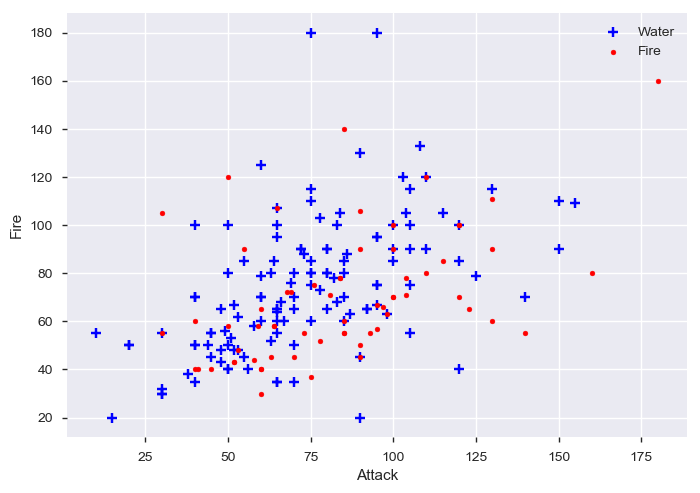

In [190]:
water=pkm[(pkm['Type 1']=='Water') | (pkm['Type 2']=='Water')]
plt.scatter(water['Attack'],water['Defense'],marker='+',color='blue',label='Water')
fire=pkm[(pkm['Type 1']=='Fire') | (pkm['Type 2']=='Fire')]
plt.scatter(fire['Attack'],fire['Defense'],marker='.',color='red',label='Fire')
plt.xlabel('Attack')
plt.ylabel('Fire')
plt.legend()

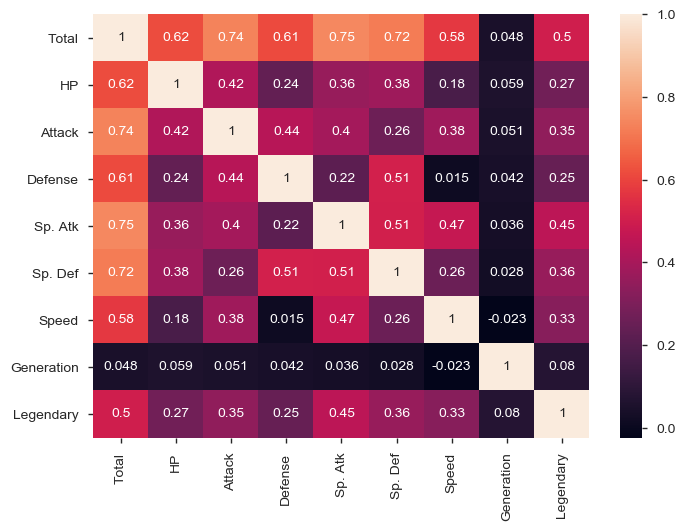

In [191]:
sns.heatmap(pkm.corr(),annot=True)

In [192]:
pkm.head(2)

Name Type 1  Type 2  Total  HP  Attack  Defense  Sp. Atk  Sp. Def  \
0  Bulbasaur  Grass  Poison    318  45      49       49       65       65   
1    Ivysaur  Grass  Poison    405  60      62       63       80       80   

   Speed  Generation  Legendary  
0     45           1      False  
1     60           1      False

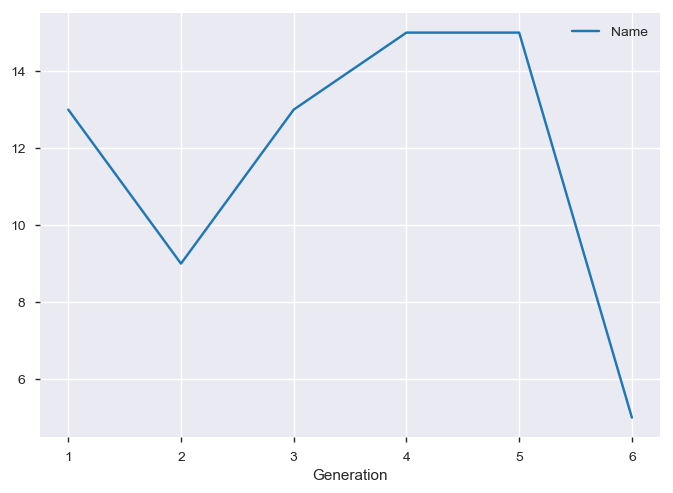

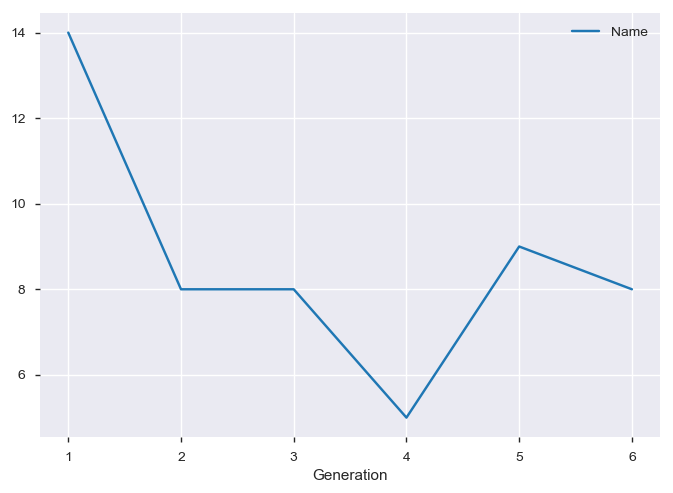

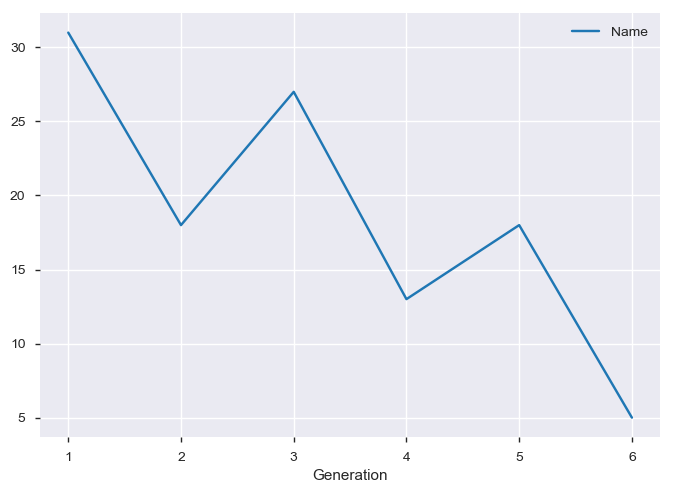

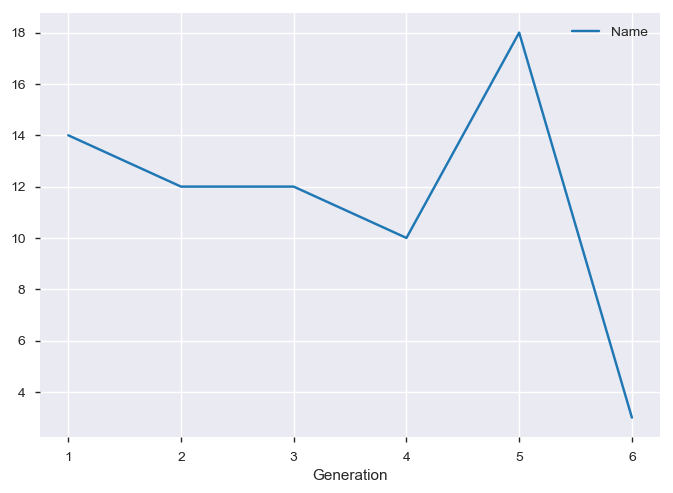

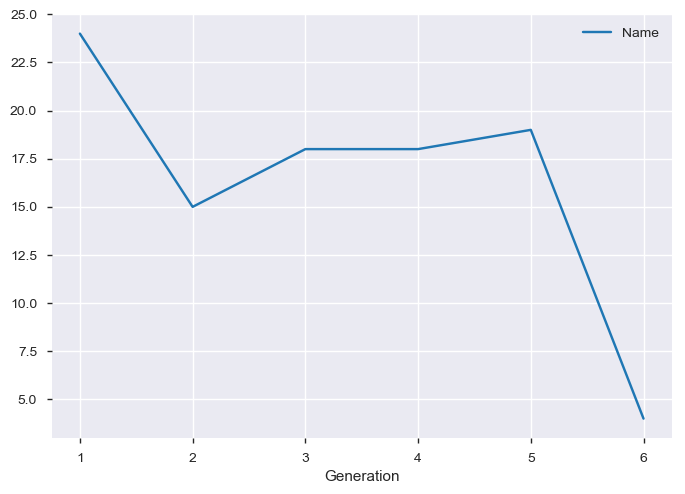

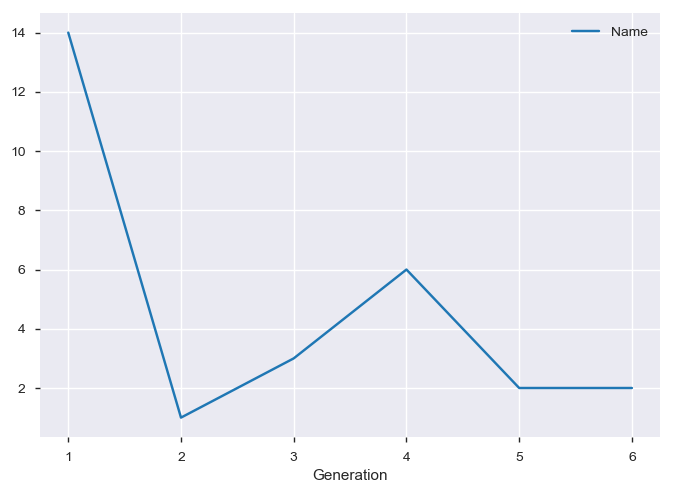

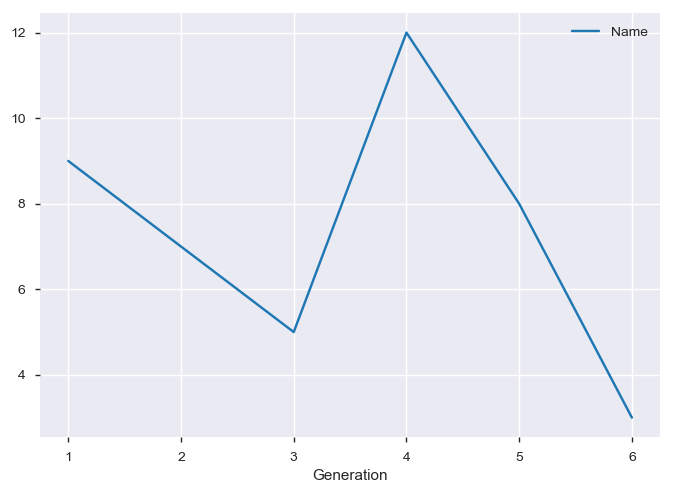

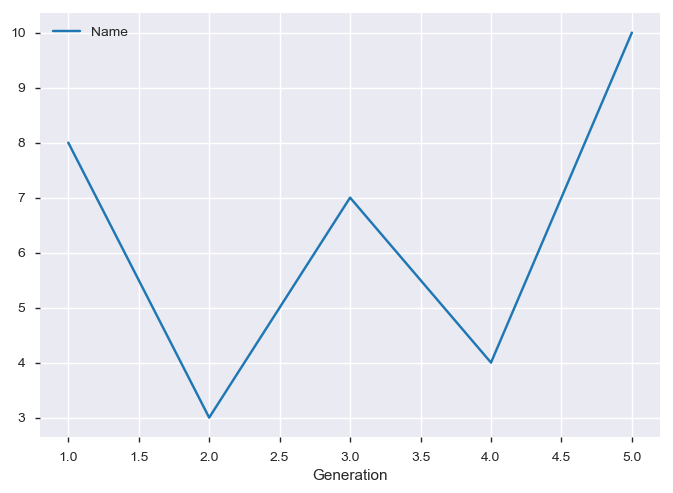

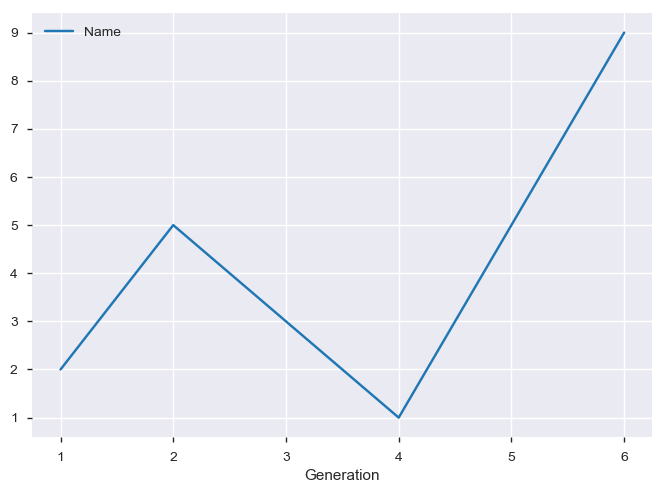

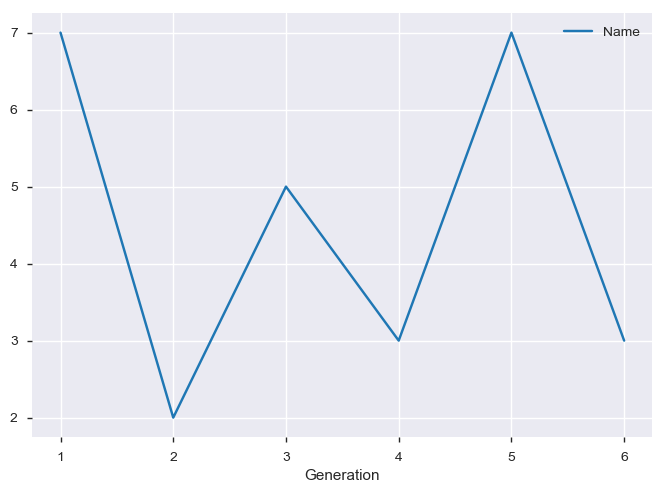

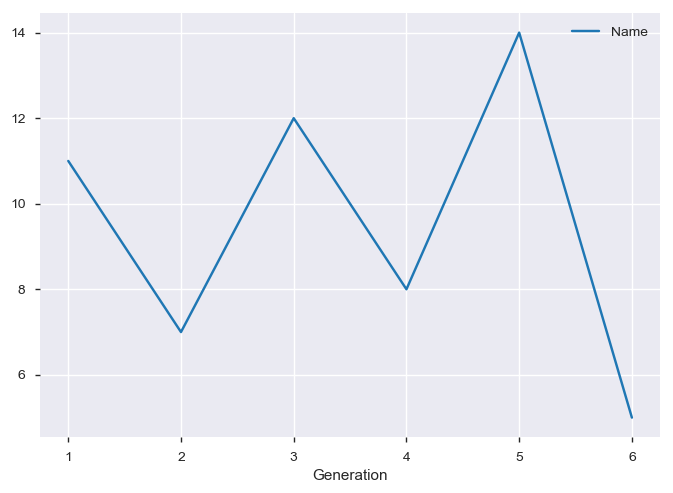

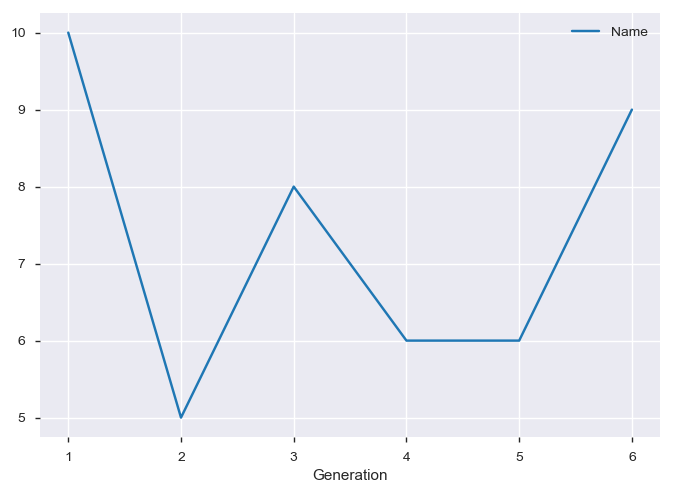

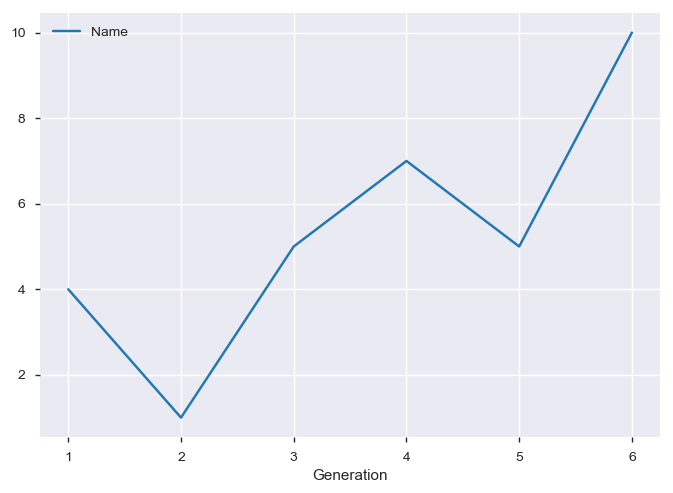

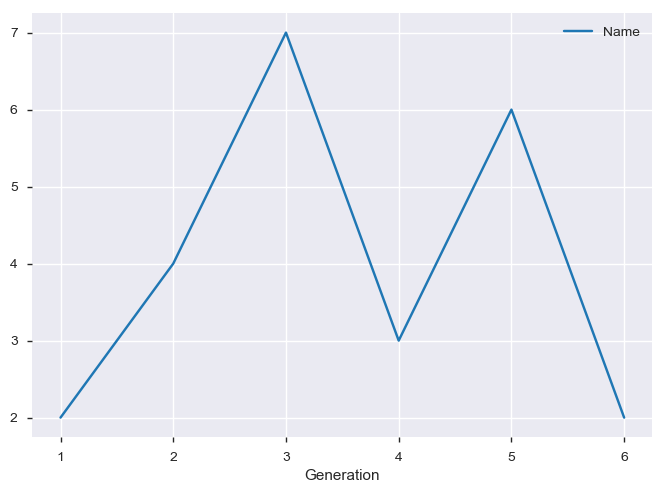

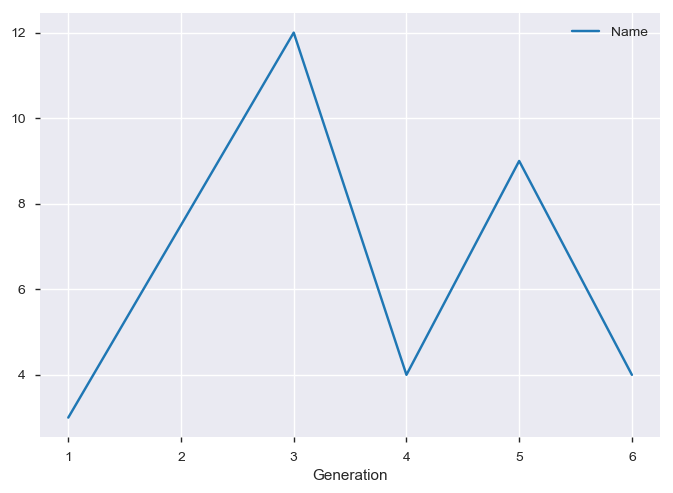

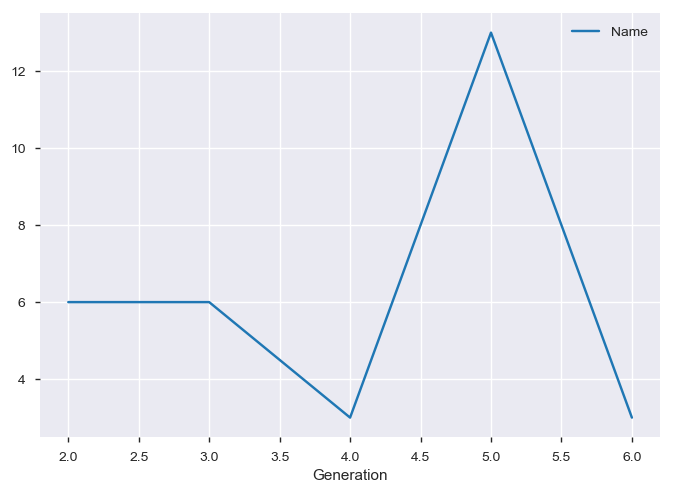

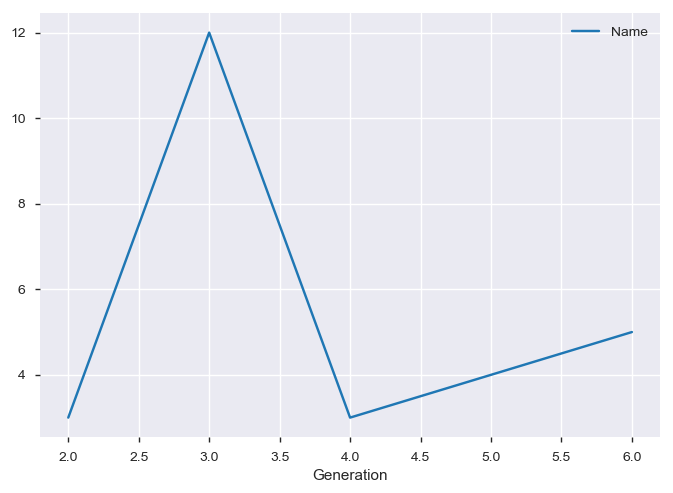

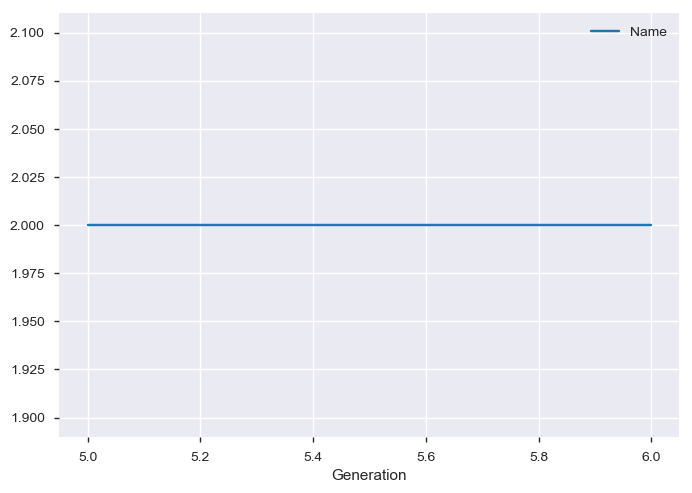

In [193]:
d=pkm.groupby(['Type 1','Generation']).count().reset_index()
d#['Type 1'].value_counts()
#d.plot.line('Generation','Name')#,hue='Type 1')
arr=pkm['Type 1'].unique()
for i in arr:
    d[d['Type 1']==i].plot.line('Generation','Name')

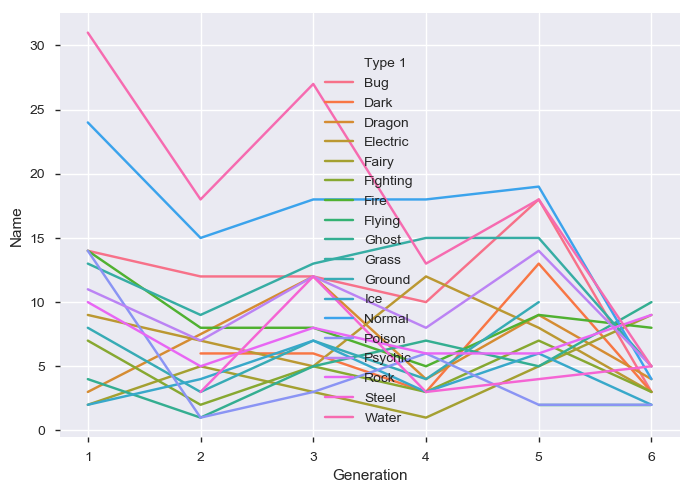

In [207]:
d
sns.lineplot(x="Generation", y='Name',
             hue="Type 1",
             data=d)

In [194]:
pkm['Type 1'].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

In [195]:
print(list(pkm))


['Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary']


In [196]:
ha=pd.DataFrame()

In [197]:
brr=['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
for i in brr:
    ha[i]=pkm[i]/pkm[i].max()

In [199]:
ha.head(2)

Total        HP    Attack   Defense   Sp. Atk   Sp. Def     Speed
0  0.407692  0.176471  0.257895  0.213043  0.335052  0.282609  0.250000
1  0.519231  0.235294  0.326316  0.273913  0.412371  0.347826  0.333333

In [204]:
pca=PCA(n_components=0.8)
pca.fit(ha)
pcascores=pd.DataFrame(pca.transform(ha))
pcascores.columns
loadings = pd.DataFrame(pca.components_, columns=brr)

In [209]:
pkm.head(3)

#       Name Type 1  Type 2  Total  HP  Attack  Defense  Sp. Atk  Sp. Def  \
0  1  Bulbasaur  Grass  Poison    318  45      49       49       65       65   
1  2    Ivysaur  Grass  Poison    405  60      62       63       80       80   
2  3   Venusaur  Grass  Poison    525  80      82       83      100      100   

   Speed  Generation  Legendary  
0     45           1      False  
1     60           1      False  
2     80           1      False

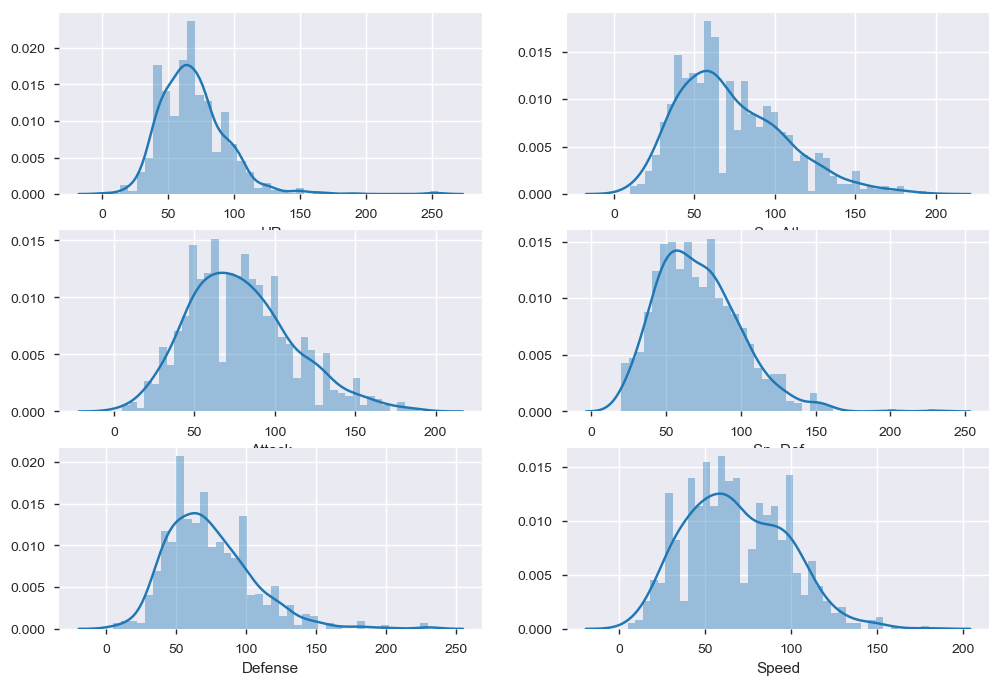

In [254]:
arr=['HP', 'Attack', 'Defense']
brr=['Sp. Atk', 'Sp. Def', 'Speed']
fig,axarr=plt.subplots(3,2, figsize=(12,8))

j=0
for i in arr:
    sns.distplot(pkm[i],bins=40,kde=True,ax=axarr[j][0])
#    plt.axvline(pkm[i].mean())
    j=j+1
j=0
for i in brr:
    sns.distplot(pkm[i],bins=40,kde=True,ax=axarr[j][1])
#    plt.axvline(pkm[i].mean())
 
    j=j+1

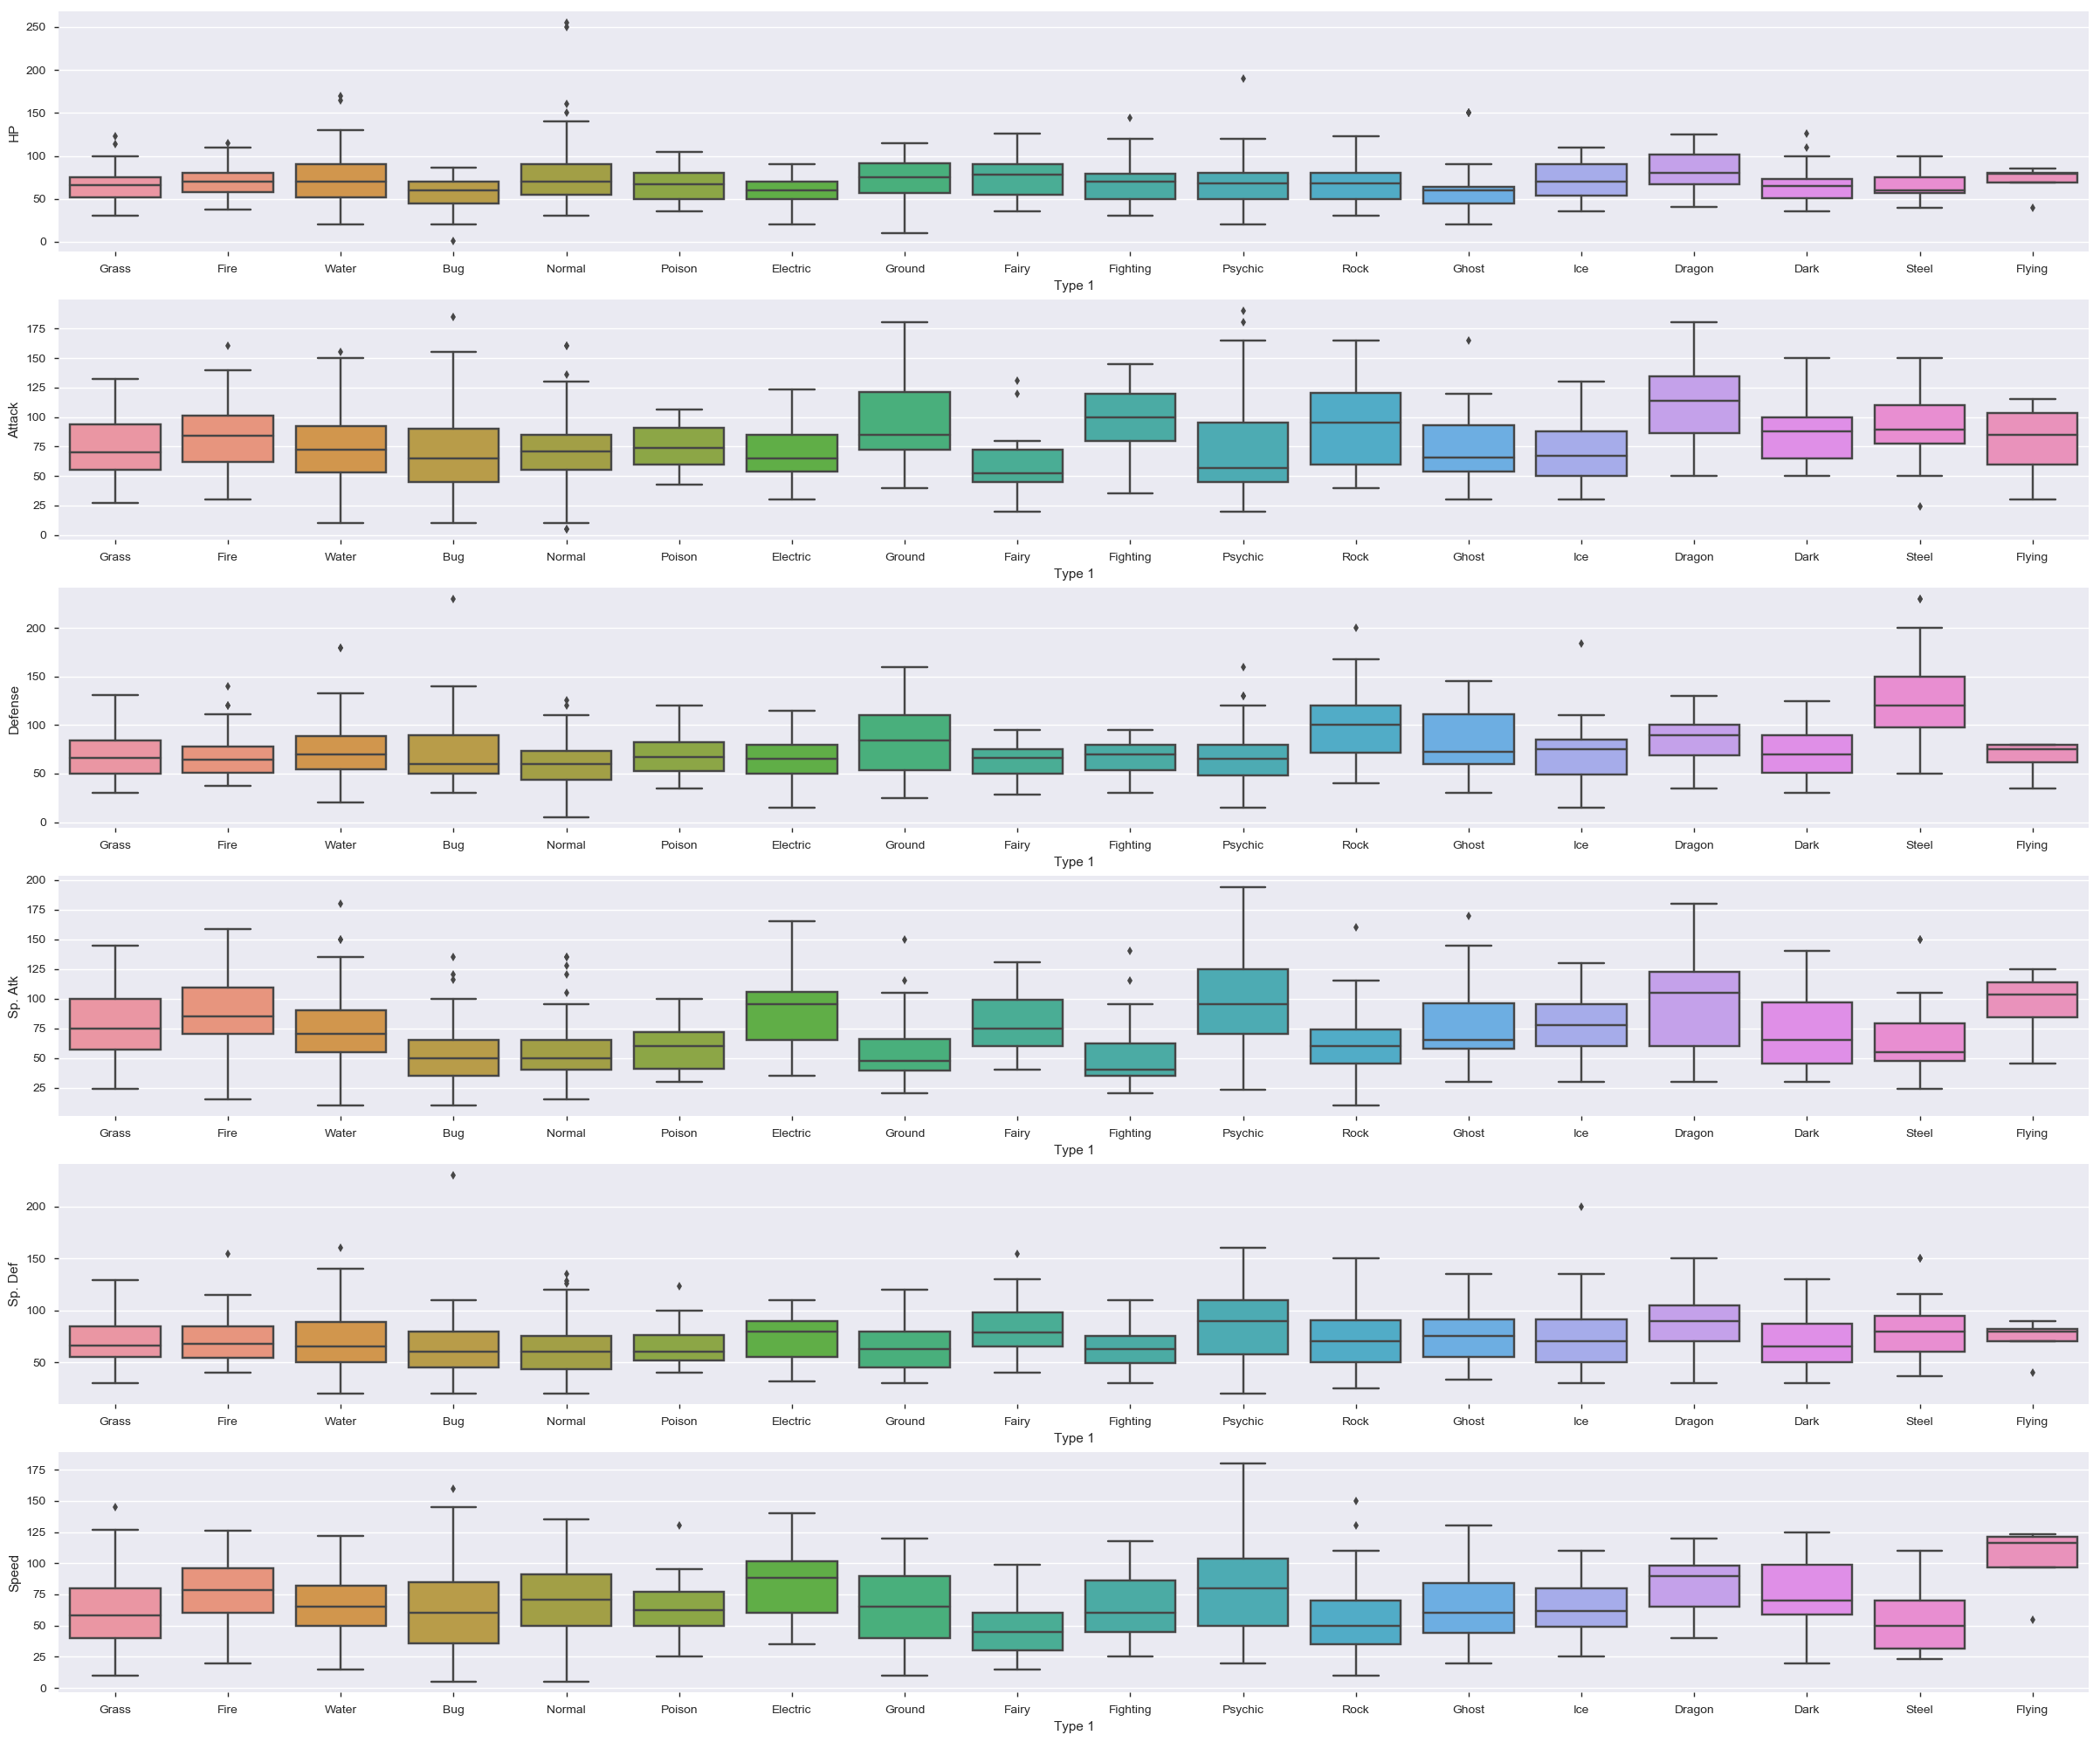

In [248]:
fig,axarr=plt.subplots(6,1,figsize=(30,25))
j=0
for i in arr:
    sns.boxplot(data=pkm,x='Type 1',y=i,ax=axarr[j])
    j=j+1
for i in brr:
    sns.boxplot(data=pkm,x='Type 1',y=i,ax=axarr[j])
    j=j+1

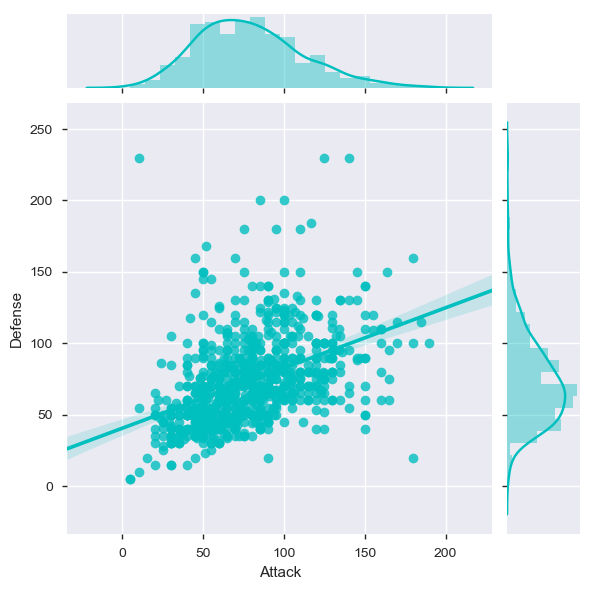

In [261]:
sns.jointplot(data=pkm,x='Attack',y='Defense',kind='reg',color ='c')

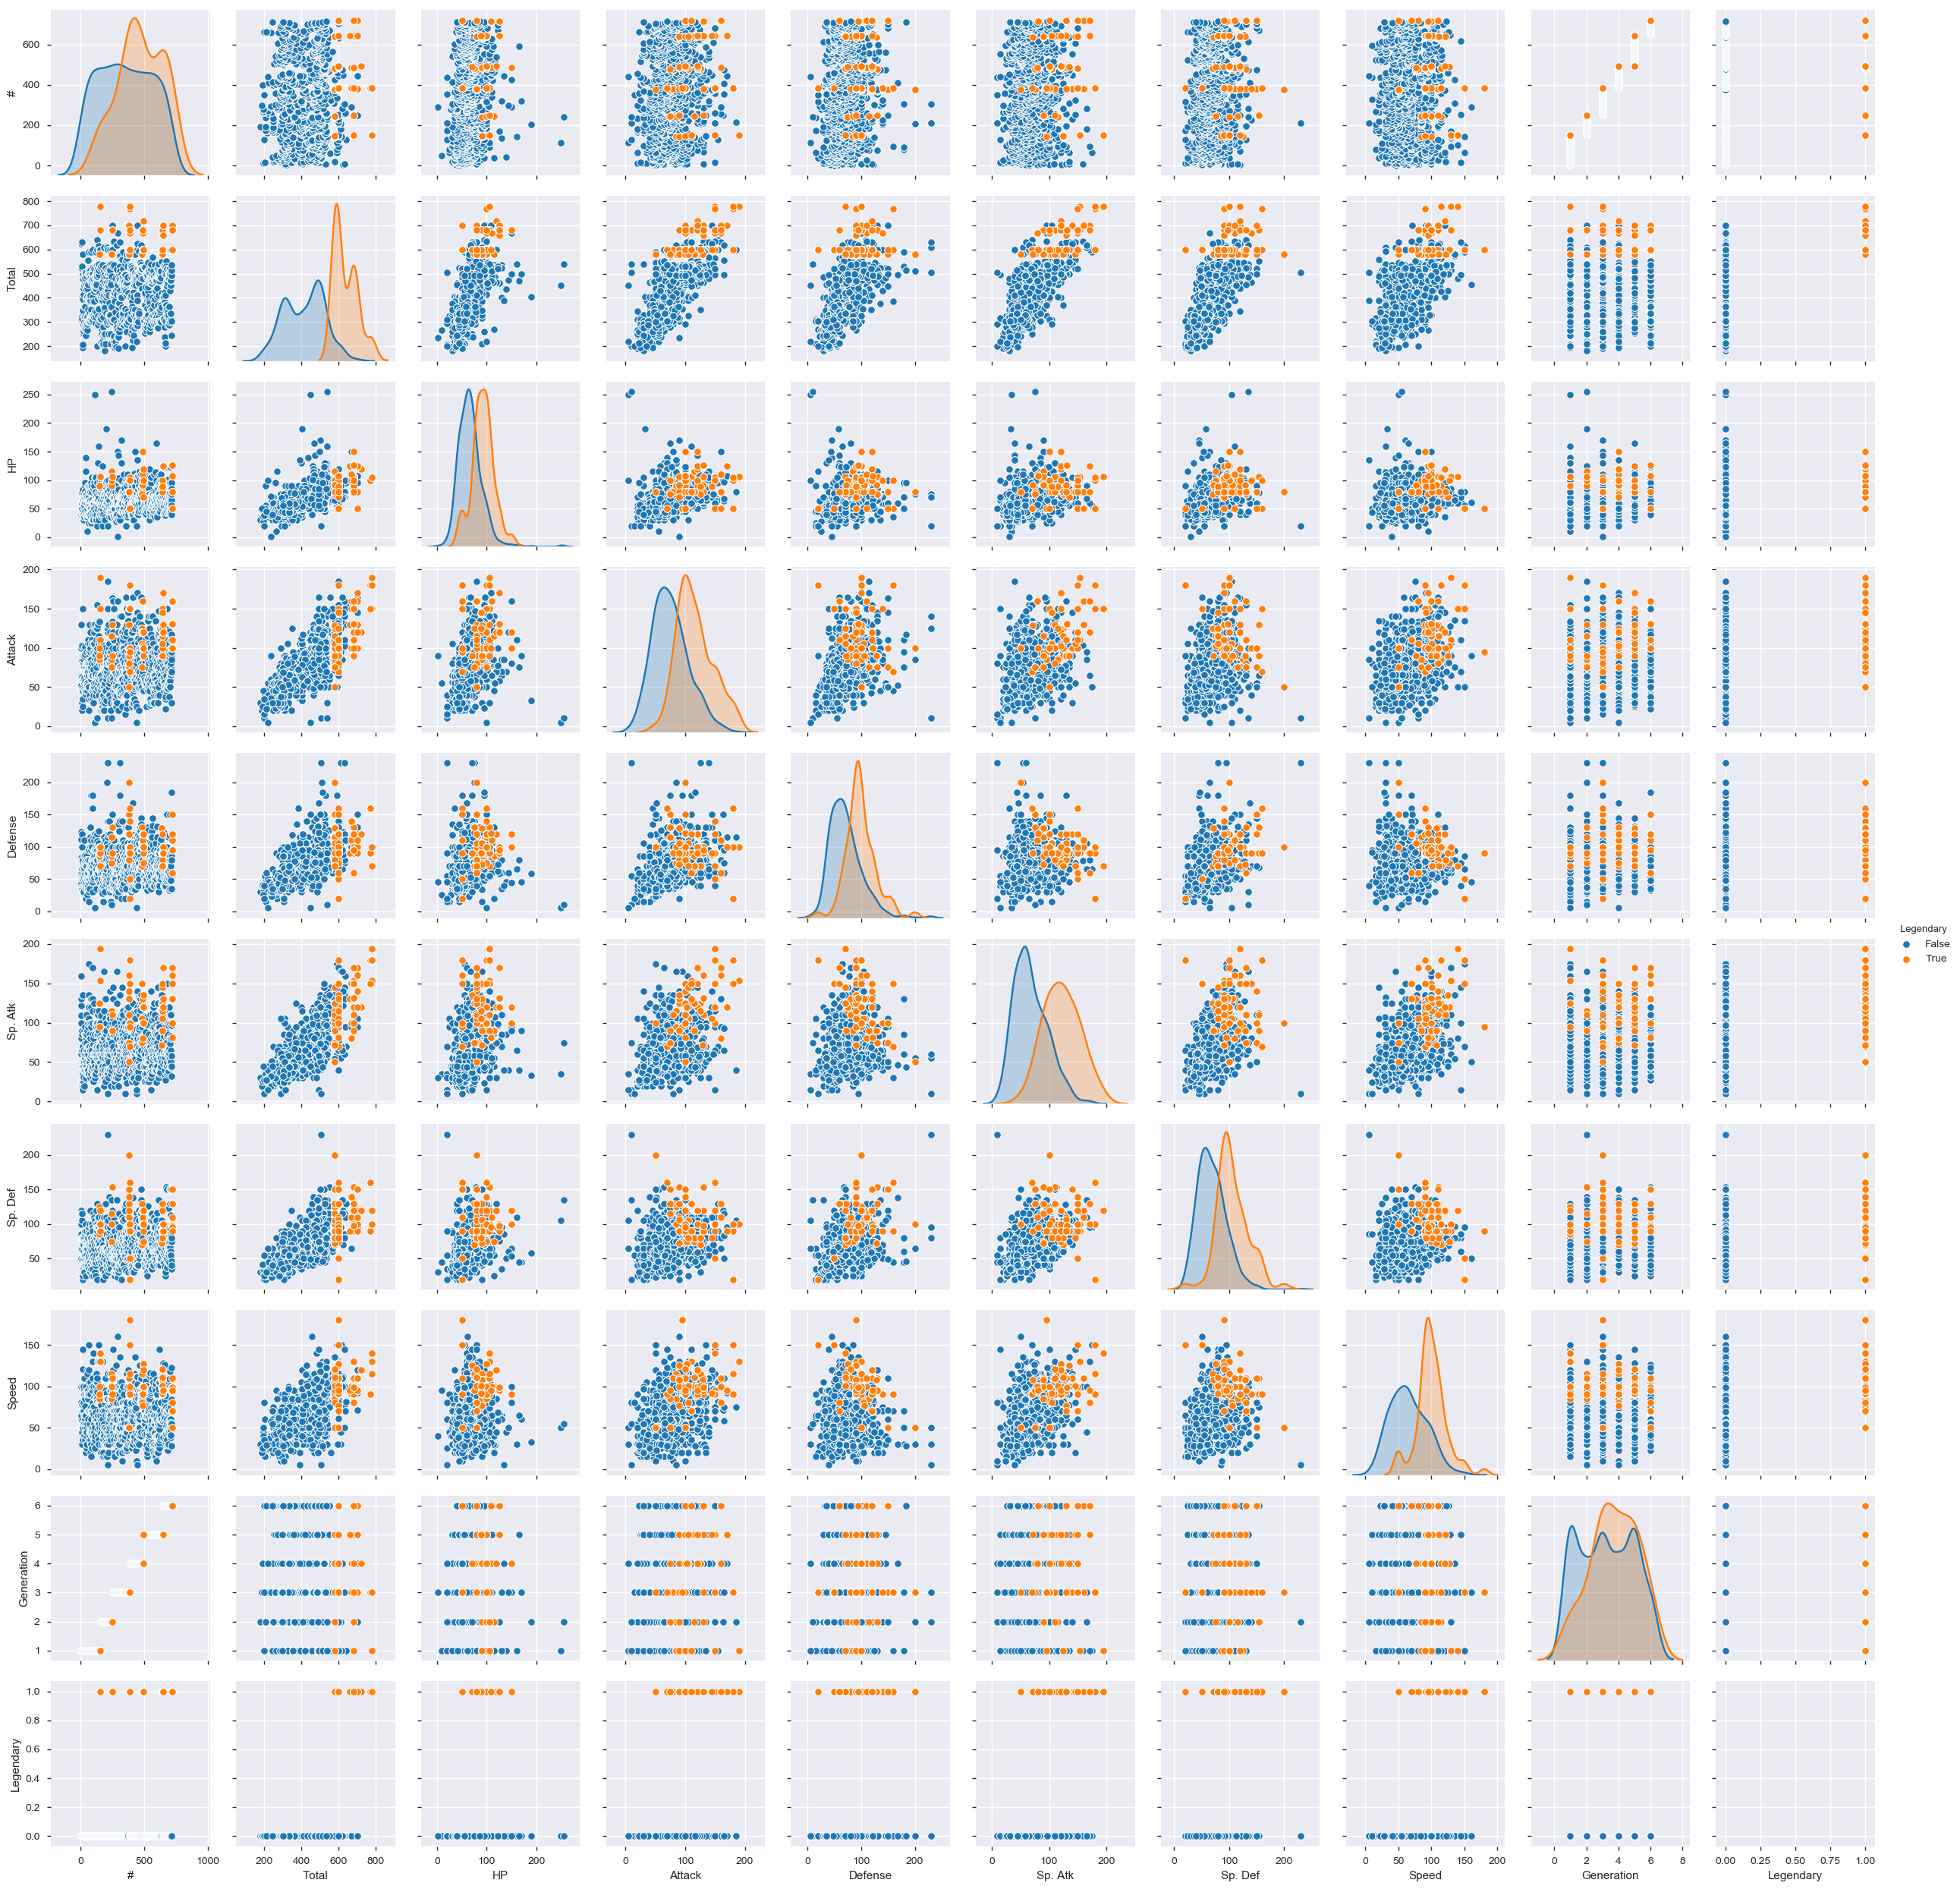

In [257]:
sns.pairplot(pkm,hue='Legendary')

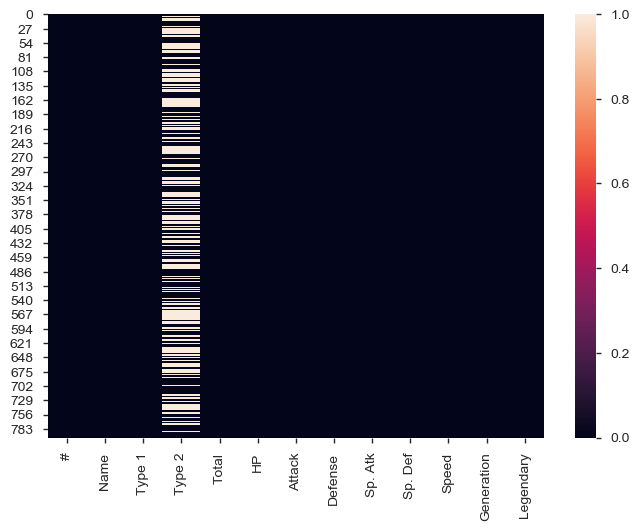

In [263]:
sns.heatmap(pkm.isnull())

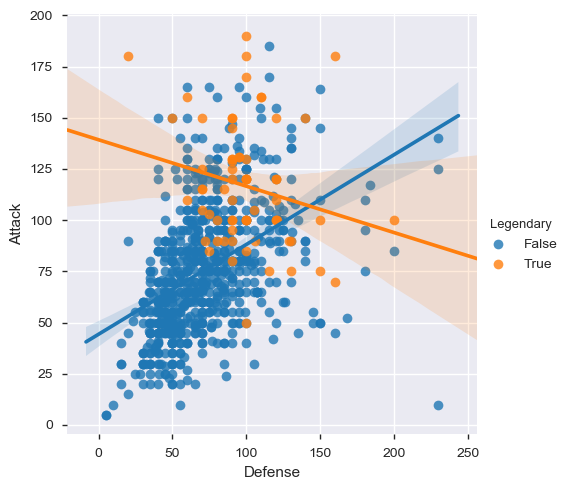

In [268]:
sns.lmplot(x="Defense",y="Attack",hue="Legendary",data=pkm,fit_reg=True)